In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

1- Generate continuous random dataset for the problem of X = study hours and Y = grade of students (if you study more, you will get a higher grade).

In [4]:
X=np.random.normal(4,1,200)
Y=np.random.normal(1,0.1,200)*X
# X,Y

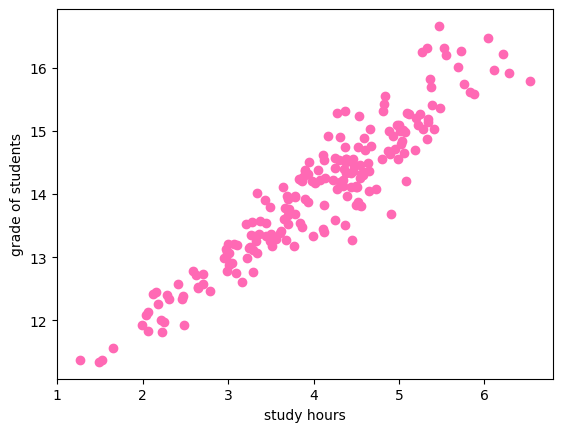

In [5]:
plt.scatter(X,Y+10,c="hotpink")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.show()

2- Split your dataset to train and test with train_test_split function.

In [6]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(X,Y , test_size=0.2, shuffle=True)
X_train, Y_train,X_test,Y_test

(array([5.02512234, 2.21073587, 4.87230793, 3.01665426, 2.22959819,
        2.9930499 , 3.07044371, 3.7867514 , 3.76933367, 4.16863243,
        3.70990961, 5.03789966, 3.2276571 , 4.98961021, 3.21196075,
        2.78641185, 1.64961158, 3.49546629, 4.26930331, 5.27255256,
        4.38290999, 2.64693338, 4.1272147 , 4.81540863, 3.98104896,
        4.25020803, 2.25642319, 4.12434646, 3.77801142, 4.67358333,
        3.94397834, 5.28272814, 5.08414426, 3.70726682, 4.50094838,
        2.97202884, 3.28513093, 3.61896659, 2.41493441, 4.49141606,
        3.29017728, 3.69390314, 1.49483415, 4.39353545, 4.89647231,
        5.19734815, 4.34940043, 1.52032352, 5.33542313, 4.65681157,
        4.5545473 , 3.09488519, 4.55304589, 4.90950516, 2.94975547,
        2.30375582, 5.4665777 , 3.98953788, 3.44566077, 5.83230842,
        3.23953623, 3.90117381, 2.04456186, 4.31092518, 3.93100201,
        2.97360358, 3.10852152, 3.25735765, 4.25500362, 4.95258096,
        3.34387075, 3.6601654 , 5.37293727, 2.64

3- Draw some wrong red lines with a random slope.

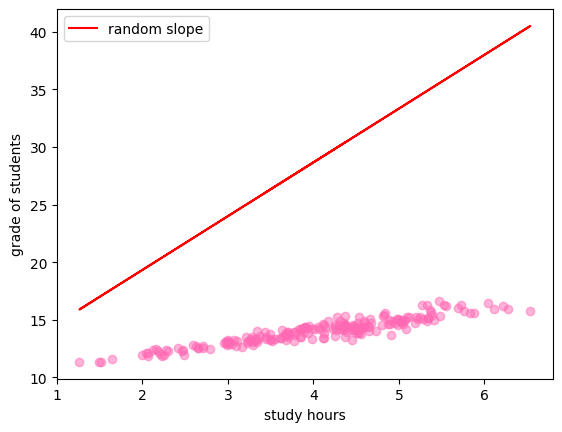

In [7]:
random_slope=np.random.uniform(0,5)
# random_slope
plt.scatter(X,Y+10,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X+10,c="red",label="random slope")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()

4- Draw the correct blue line using your Object Oriented Linear Least Squares (LLS) method.

In [8]:
np.shape(X_train)
X_train=X_train.reshape(-1,1)

In [9]:
W=np.matmul(np.matmul(np.linalg.inv(np.matmul(X_train.T,X_train)),X_train.T),Y_train)
W

array([0.99105081])

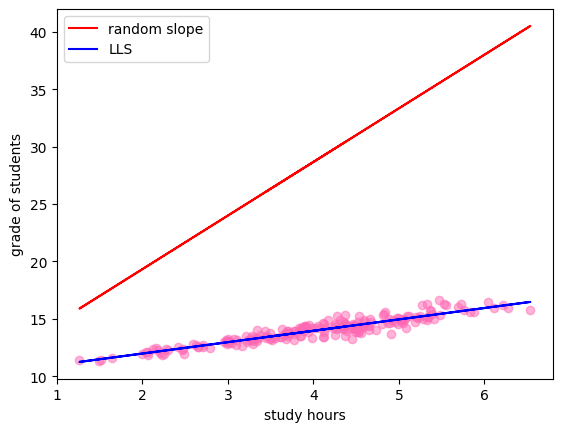

In [10]:
plt.scatter(X,Y+10,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X+10,c="red",label="random slope")
plt.plot(X,W*X+10,c="blue",label="LLS")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()

5- Draw a green line using linregress from scipy library. Compare your result with scipy's result.

In [11]:
from scipy import stats

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:196: RuntimeWarning: invalid value encountered in sqrt
  t = r * np.sqrt(df / ((1.0 - r + TINY)*(1.0 + r + TINY)))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\scipy\stats\_stats_mstats_common.py:199: RuntimeWarning: invalid value encountered in sqrt
  slope_stderr = np.sqrt((1 - r**2) * ssym / ssxm / df)


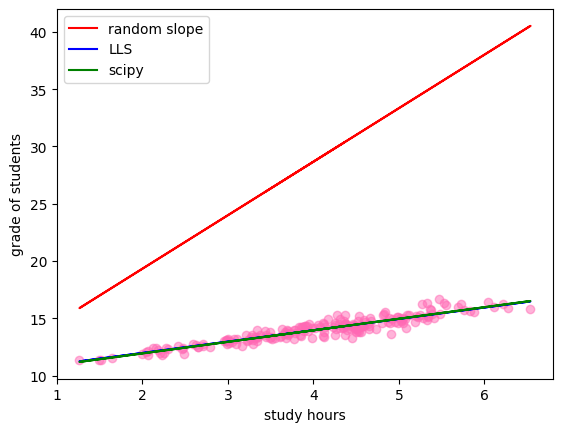

In [12]:
slope, intercept, r, p, std_err = stats.linregress(X_train.T,Y_train)
def myfunc(x):
  return slope * x + intercept

# mymodel = list(map(myfunc, X))
# mymodel

plt.scatter(X,Y+10,c="hotpink",alpha=0.5)
plt.plot(X,random_slope*X+10,c="red",label="random slope")
plt.plot(X,W*X+10,c="blue",label="LLS")
plt.plot(X,slope * X + intercept+10,c="green",label="scipy")
plt.xlabel("study hours")
plt.ylabel("grade of students")
plt.legend()
plt.show()
